RANDOM FOREST

Alasan memilih algoritma ini:
- Random Forest umumnya menghasilkan performa yang baik karena menggabungkan hasil dari beberapa pohon keputusan independen.
- Random Forest memiliki mekanisme pembagian acak dan agregasi yang membantu mengurangi risiko overfitting.

Apakah klien sudah berlangganan term deposit? (biner: 'yes', 'no')

In [1]:
# import pandas dan numpy
import pandas as pd 
import numpy as np 

pd.set_option("display.max.columns", None)

In [2]:
# membaca dataset dari file menggunakan pandas 
df_bank = pd.read_csv('D:/MSIB-4/LATIHAN/ASSIGNMENT 3/bank-additional-full.csv',sep=';',engine='python')
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# mengecek ukuran data
df_bank.shape

(41188, 21)

In [4]:
# mengecek tipe data kolom
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# mengecek index kolom
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
# mengubah kolom y menjadi deposit
df_bank = df_bank.rename(columns={'y': 'deposit'})
df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
# Menghapus kolom duration
df_bank=df_bank.drop('duration', axis=1)

Kolom duration tidak diikutsertakan dalam analisis untuk memperoleh hasil analisis yang lebih mendalam dan akurat

In [8]:
# mengecek missing values
df_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [9]:
# Import semua packages yang diperlukan
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [10]:
# Membuat label pada variabel kategori
le = LabelEncoder() 
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_bank[col] = label_encoder.fit_transform(df_bank[col])

Kolom-kolom tersebut memiliki data dengan tipe object sehingga perlu diubah ke numeric menggunakan label encoder

In [11]:
# Memisahkan fitur dan label 
x = df_bank.drop('deposit', axis=1)
y = df_bank['deposit']

# Mengganti nilai "1" dan "0" menjadi "yes" dan "no"
labels = y.replace({1: 'yes', 0: 'no'})

In [12]:
# Membagi data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Membuat model random forest
rf = RandomForestClassifier(n_estimators=100)

n_estimators: jumlah pohon keputusan yang akan dibangun dalam Random Forest. Semakin tinggi nilai n_estimators, semakin kompleks modelnya. Namun, nilai yang terlalu tinggi dapat menyebabkan waktu komputasi yang lebih lama. Nilai umum yang digunakan adalah 100 atau lebih.

random_state: angka yang digunakan oleh generator angka acak dalam Random Forest.

In [13]:
# Melatih model dengan data latih
rf.fit(x_train, y_train)

# Mengevaluasi Model
from sklearn.metrics import accuracy_score
predictions = rf.predict(x_test)


In [14]:
# Memprediksi label menggunakan data uji
y_pred = rf.predict(x_test)

# Import scikit-learn metrics untuk kalkulasi akurasi
from sklearn import metrics

# Evaluasi kinerja model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8924496236950716


Hasil prediksi akurasi menunjukkan akurasi 89.24% yang menunjukkan akurasi yang cukup baik. 

# Visualisasi prediksi deposit 

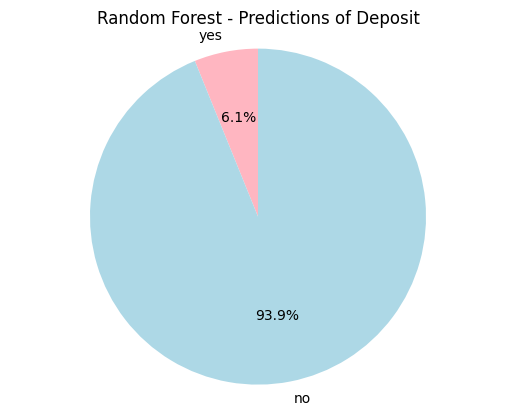

In [15]:
import matplotlib.pyplot as plt

# Menghitung jumlah prediksi "yes" dan "no"
count_yes = sum(predictions == "yes")
count_no = sum(predictions == "no")

# Membuat visualisasi pie chart
labels = ['yes', 'no']
sizes = [count_yes, count_no]
colors = ['lightpink', 'lightblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Random Forest - Predictions of Deposit')
plt.show()

Sebagian besar (93.9%) klien tidak term deposit, hanya sebagian kecil yang term deposit (6.1%)

# Mencari feature penting yang berpengaruh dalam hasil prediksi

In [28]:
# Mendapatkan tingkat kepentingan fitur
feature_imp = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)

# Menampilkan tingkat kepentingan fitur
print(feature_imp)

age               0.180839
euribor3m         0.137695
job               0.084295
campaign          0.083625
education         0.076154
nr.employed       0.070082
day_of_week       0.060238
marital           0.040582
housing           0.038345
pdays             0.034395
poutcome          0.030363
cons.conf.idx     0.026841
loan              0.026534
emp.var.rate      0.023120
month             0.020739
cons.price.idx    0.019274
previous          0.017575
contact           0.014739
default           0.014564
dtype: float64


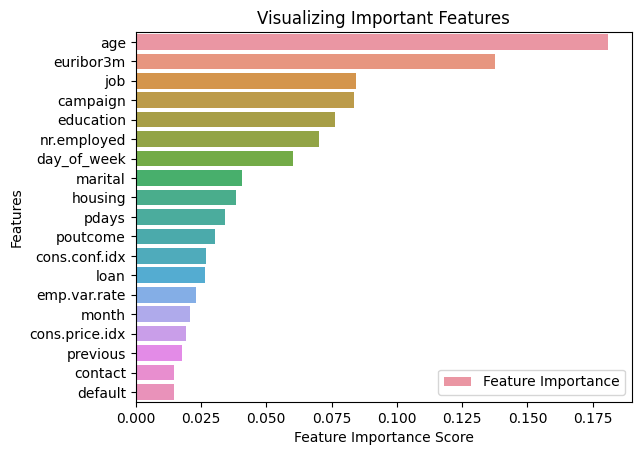

In [27]:
# Import matplotlib.pyplot dan seaborn untuk visualisasi 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Membuat bar plot
sns.barplot(x=feature_imp, y=feature_imp.index, label="Feature Importance")

# Menambahkan label ke bar plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


Fitur penting yang paling berpengaruh adalah age diikuti oleh euribor3m, job, campaign, education, dan seterusnya. Default merupakan fitur yang paling sedikit pengaruhnya terhadap keputusan klien untuk deposit atau tidak. 

# Akurasi jika menghapus fitur "default"

In [18]:
# Import semua packages yang diperlukan
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
import pandas as pd
# Membaca data
cb = pd.read_csv('D:/MSIB-4/LATIHAN/ASSIGNMENT 3/bank-additional-full.csv',sep=';',engine='python')

# Rename y menjadi deposit
cb = cb.rename(columns={'y': 'deposit'})

# Menghapus kolom "duration"
cb=cb.drop('duration', axis=1)

In [20]:
# Membuat label pada variabel kategori
le = LabelEncoder() 
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'deposit']
label_encoder = LabelEncoder()
for colom in categorical_cols:
    cb[colom] = label_encoder.fit_transform(cb[colom])

In [21]:
# Import train_test_split function
##from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# Split dataset into features and labels
feature_b=cb.drop(['default', 'deposit'], axis=1)
label_b=cb['deposit']
feature_b_train, feature_b_test, label_b_train, label_b_test = train_test_split(feature_b, label_b, test_size=0.3, random_state=42 )

In [22]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier 

#Create a Gaussian Classifier
clf_b=RandomForestClassifier(n_estimators=100) 

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_b.fit(feature_b_train,label_b_train) 

# prediction on test set
label_b_pred=clf_b.predict(feature_b_test) 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(label_b_test, label_b_pred))

Accuracy: 0.8930970300234685


Menghapus feature "default" dalam prediksi deposit meningkatkan akurasi sebesar 7% (89.24% menjadi 89.31%)

# Visualisasi sebaran nilai pada masing-masing fitur

Histogram sebaran nilai pada fitur age, campaign, pdays, previous, emp.var.rate, cons.conf.idx, cons.price.idx, nr,employed

In [23]:
# membaca dataset dari file menggunakan pandas 
df_dep = pd.read_csv('D:/MSIB-4/LATIHAN/ASSIGNMENT 3/bank-additional-full.csv',sep=';',engine='python')
df_dep.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Marital, Housing, Loan, Contact, Default, Poutcome

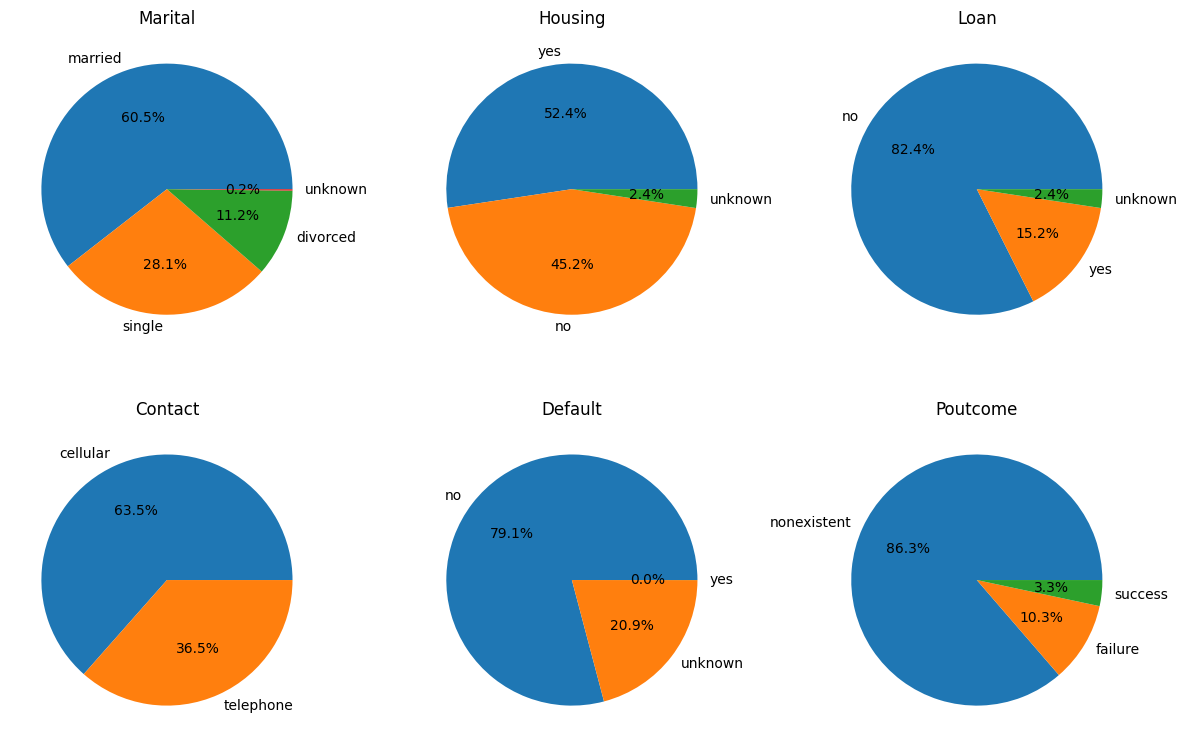

In [24]:
import matplotlib.pyplot as plt
marital_counts = df_dep['marital'].value_counts()
housing_counts = df_dep['housing'].value_counts()
loan_counts = df_dep['loan'].value_counts()
contact_counts=df_dep['contact'].value_counts()
default_counts=df_dep['default'].value_counts()
poutcome_counts=df_dep['poutcome'].value_counts()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

axes[0, 0].pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%')
axes[0, 0].set_title('Marital')

axes[0, 1].pie(housing_counts, labels=housing_counts.index, autopct='%1.1f%%')
axes[0, 1].set_title('Housing')

axes[0, 2].pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%')
axes[0, 2].set_title('Loan')

axes[1, 0].pie(contact_counts, labels=contact_counts.index, autopct='%1.1f%%')
axes[1, 0].set_title('Contact')

axes[1, 1].pie(default_counts, labels=default_counts.index, autopct='%1.1f%%')
axes[1, 1].set_title('Default')

axes[1, 2].pie(poutcome_counts, labels=poutcome_counts.index, autopct='%1.1f%%')
axes[1, 2].set_title('Poutcome')

plt.tight_layout()
plt.show()


Job, Education, Month, Day_of_week

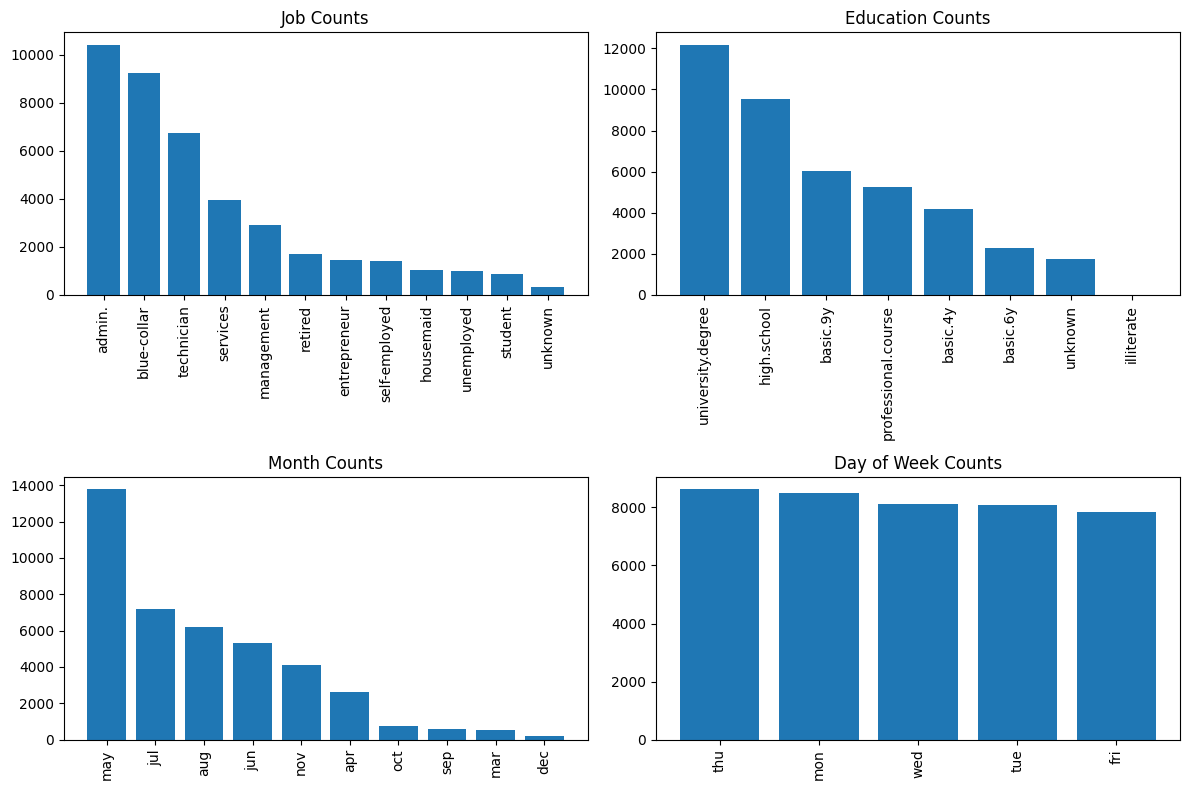

In [31]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot job counts
job_counts = df_dep['job'].value_counts()
axes[0, 0].bar(job_counts.index, job_counts.values)
axes[0, 0].set_xticks(range(len(job_counts)))
axes[0, 0].set_xticklabels(job_counts.index, rotation=90)
axes[0, 0].set_title('Job Counts')

# Plot education counts
education_counts = df_dep['education'].value_counts()
axes[0, 1].bar(education_counts.index, education_counts.values)
axes[0, 1].set_xticks(range(len(education_counts)))
axes[0, 1].set_xticklabels(education_counts.index, rotation=90)
axes[0, 1].set_title('Education Counts')

# Plot month counts
month_counts = df_dep['month'].value_counts()
axes[1, 0].bar(month_counts.index, month_counts.values)
axes[1, 0].set_xticks(range(len(month_counts)))
axes[1, 0].set_xticklabels(month_counts.index, rotation=90)
axes[1, 0].set_title('Month Counts')

# Plot day of week counts
day_of_week_counts = df_dep['day_of_week'].value_counts()
axes[1, 1].bar(day_of_week_counts.index, day_of_week_counts.values)
axes[1, 1].set_xticks(range(len(day_of_week_counts)))
axes[1, 1].set_xticklabels(day_of_week_counts.index, rotation=90)
axes[1, 1].set_title('Day of Week Counts')

plt.tight_layout()
plt.show()

Age, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, nr.employed 

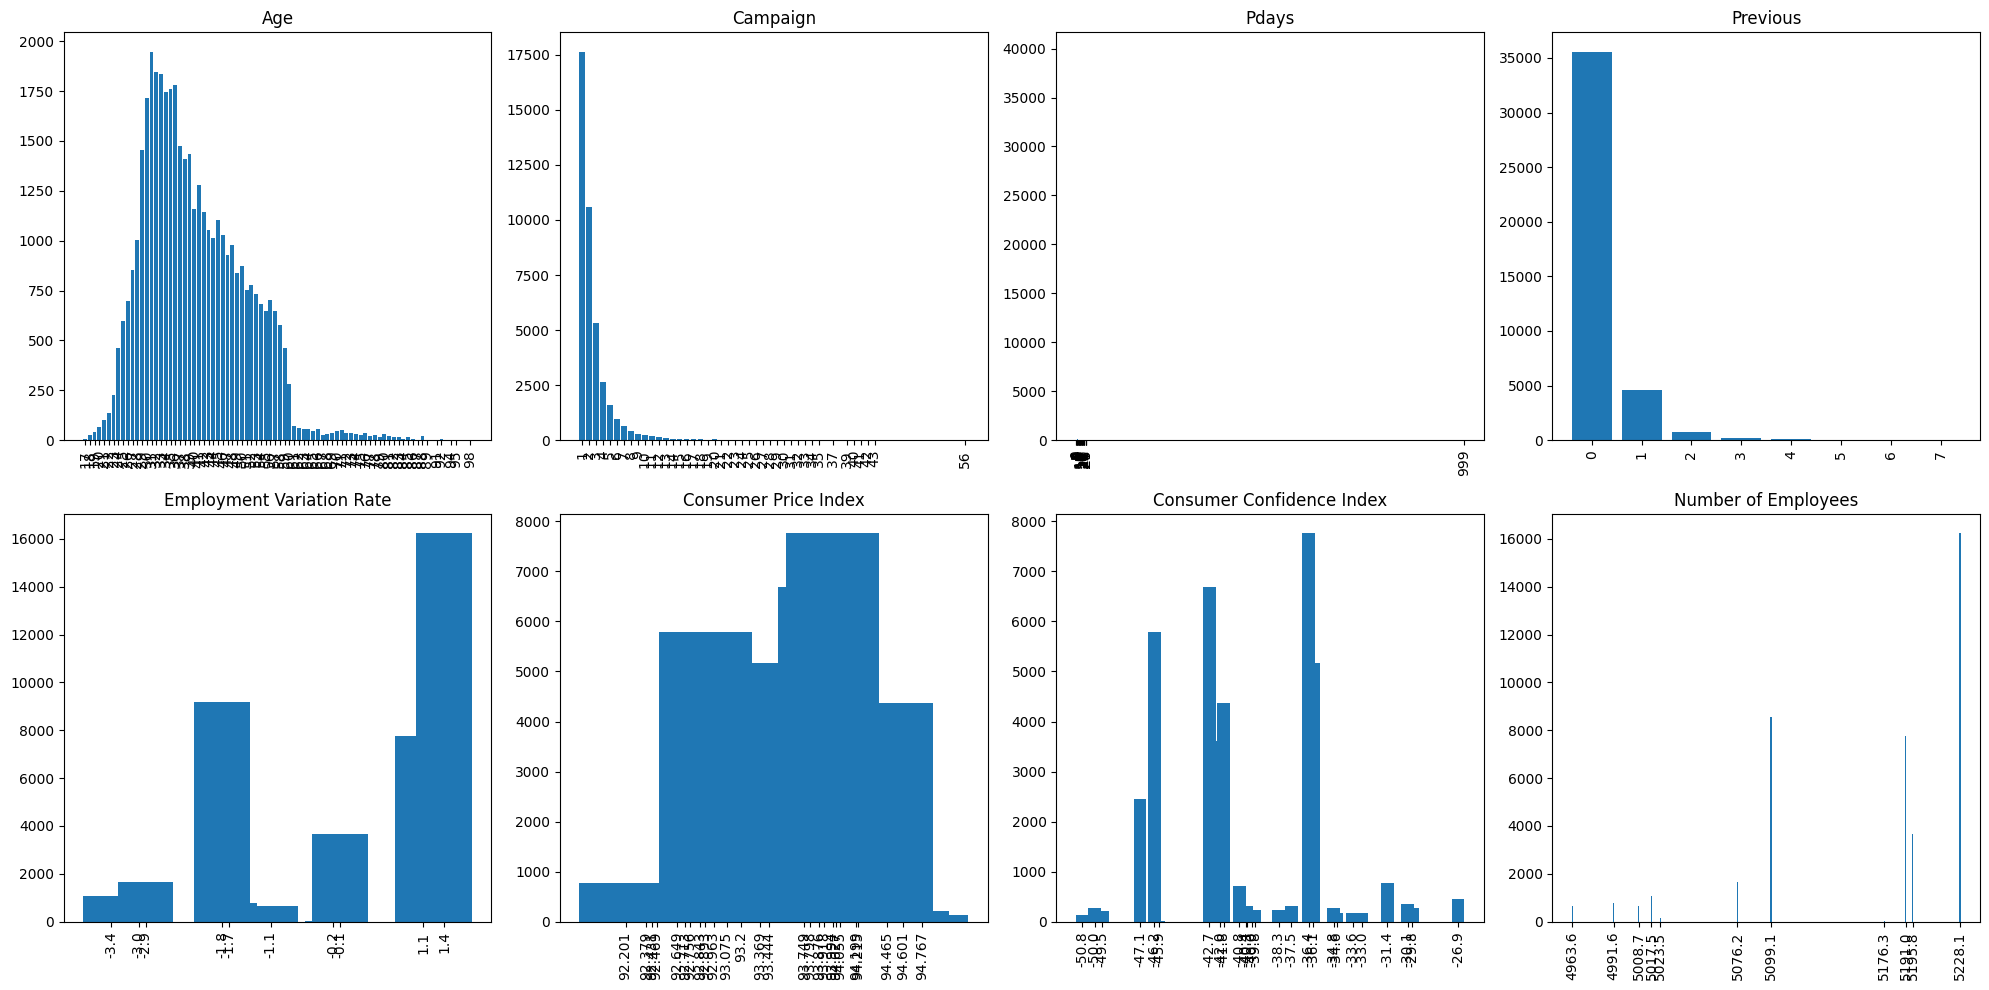

In [32]:
import matplotlib.pyplot as plt

age_counts = df_dep['age'].value_counts()
campaign_counts = df_dep['campaign'].value_counts()
pdays_counts = df_dep['pdays'].value_counts()
previous_counts = df_dep['previous'].value_counts()
emp_var_rate_counts = df_dep['emp.var.rate'].value_counts()
cons_price_idx_counts = df_dep['cons.price.idx'].value_counts()
cons_conf_idx_counts = df_dep['cons.conf.idx'].value_counts()
nr_employed_counts = df_dep['nr.employed'].value_counts()

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

axes[0, 0].bar(age_counts.index, age_counts.values)
axes[0, 0].set_xticks(age_counts.index)
axes[0, 0].set_xticklabels(age_counts.index, rotation=90)
axes[0, 0].set_title('Age')

axes[0, 1].bar(campaign_counts.index, campaign_counts.values)
axes[0, 1].set_xticks(campaign_counts.index)
axes[0, 1].set_xticklabels(campaign_counts.index, rotation=90)
axes[0, 1].set_title('Campaign')

axes[0, 2].bar(pdays_counts.index, pdays_counts.values)
axes[0, 2].set_xticks(pdays_counts.index)
axes[0, 2].set_xticklabels(pdays_counts.index, rotation=90)
axes[0, 2].set_title('Pdays')

axes[0, 3].bar(previous_counts.index, previous_counts.values)
axes[0, 3].set_xticks(previous_counts.index)
axes[0, 3].set_xticklabels(previous_counts.index, rotation=90)
axes[0, 3].set_title('Previous')

axes[1, 0].bar(emp_var_rate_counts.index, emp_var_rate_counts.values)
axes[1, 0].set_xticks(emp_var_rate_counts.index)
axes[1, 0].set_xticklabels(emp_var_rate_counts.index, rotation=90)
axes[1, 0].set_title('Employment Variation Rate')

axes[1, 1].bar(cons_price_idx_counts.index, cons_price_idx_counts.values)
axes[1, 1].set_xticks(cons_price_idx_counts.index)
axes[1, 1].set_xticklabels(cons_price_idx_counts.index, rotation=90)
axes[1, 1].set_title('Consumer Price Index')

axes[1, 2].bar(cons_conf_idx_counts.index, cons_conf_idx_counts.values)
axes[1, 2].set_xticks(cons_conf_idx_counts.index)
axes[1, 2].set_xticklabels(cons_conf_idx_counts.index, rotation=90)
axes[1, 2].set_title('Consumer Confidence Index')

axes[1, 3].bar(nr_employed_counts.index, nr_employed_counts.values)
axes[1, 3].set_xticks(nr_employed_counts.index)
axes[1, 3].set_xticklabels(nr_employed_counts.index, rotation=90)
axes[1, 3].set_title('Number of Employees')

plt.tight_layout()
plt.show()


# Kesimpulan akhir


Prediksi term deposit menggunakan random forest menunjukkan bahwa sebagian besar (93.9%) klien tidak term deposit, hanya sebagian kecil yang term deposit (6.1%) dengan akurasi 89.24%. Analisis random forest ini dilakukan menggunakan data latih sebesar 0.3 dari jumlah data dengan random state 42 dan jumlah estimator 100. Fitur penting yang paling berpengaruh adalah age dan fitur yang paling sedikit pengaruhnya terhadap keputusan klien untuk deposit atau tidak adalah default. Dengan menghapus fitur default dalam analisis prediksi didapatkan peningkatan akurasi 7% sehingga didapatkan akudasi sebesar 89.31%.